# **Delinquency Telecom Model**


**Definition:**
Delinquency is a condition that arises when an activity or situation does not occur at its scheduled (or expected) date i.e., it occurs later than expected.

**Use Case:**
Many donors, experts, and microfinance institutions (MFI) have become convinced that using mobile financial services (MFS) is more convenient and efficient, and less costly, than the traditional high-touch model for delivering microfinance services. MFS becomes especially useful when targeting the unbanked poor living in remote areas. The implementation of MFS, though, has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

One of our Client in Telecom collaborates with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be delinquent if he deviates from the path of paying back the loaned amount within 5 days

***Machine Learning problem :**

Create a delinquency model which can predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan (Label ‘1’ & ’0’)
Basically a Binary Classification setup
Real-world/Business objectives and constraints.
No low-latency requirement.
Interpretability is important.
Probability of a data-point belonging to each class is needed.
Performance Metric
Log-loss (Since probabilities is our concern)
Confusion matrix (Also want to check some precision and recalls)

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_file.csv')
df = pd.read_csv('data_file -Original.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


#### Obsarvation:-
Data contain extra index column which will be removed, MSISDN,pdate and pcircle column will also be removed as they are not going to help

In [3]:
#To display all row while discribing the dataset, by default describe display only first 5 and last 5 rows in output
#pd.set_option('display.max_row',None)
pd.set_option('display.max_column',40)

In [4]:
df.shape  #Display shape of data we are going to use, in curent dataset there are 207 row and 61 columns

(209593, 37)

In [5]:
#if we don't set pd.set_option('display.max_row',None), dtypes will return first 5 and last 5 rows only.
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

#### Obsarvation:-

Maximum number are uniqe, we can drop these number.

In [6]:
df['msisdn'].value_counts()

47819I90840    7
04581I85330    7
43096I88688    6
55809I89238    6
67324I84453    6
              ..
54660I89232    1
11535I85330    1
36343I84455    1
31358I95201    1
75829I85329    1
Name: msisdn, Length: 186243, dtype: int64

In [7]:
df1=df.drop(["Unnamed: 0","msisdn","aon","pcircle","pdate"],axis=1)
#df1=df1.iloc[:,1:-1]
df1.head()

,label,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


In [8]:
df1.shape

(209593, 32)

In [9]:
df1.describe()

,label,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


### Obsarvation:-

1. Count in all column are same, it indicate that there is no null value exist in this data set.
2. Huge difference in means and Max value for multiple columns, it indicate that outlier exist in this data set, which we will handle in next steps.
3. Mean and 50%(Medien ) has huge difference , it indicate that columns data is skewed.
4. Nagative Value exist in this data frame

In [10]:
df1.isnull().sum()

label                   0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

No NUll Value(NaN) prasent.


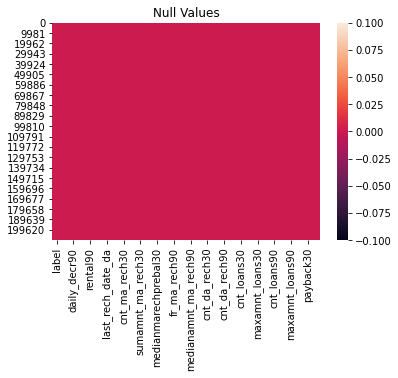

In [14]:
import matplotlib.pyplot as plt
plt.figure()
sns.heatmap(df1.isnull())
plt.title("Null Values")
plt.show()

<AxesSubplot:xlabel='label', ylabel='count'>

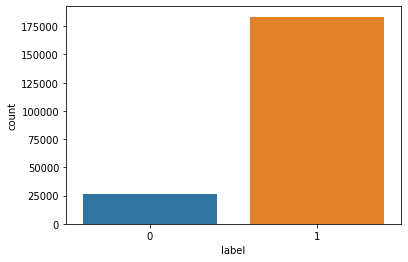

In [15]:
sns.countplot(df1['label'])

### Obsarvation:-
Data is immbalanced 

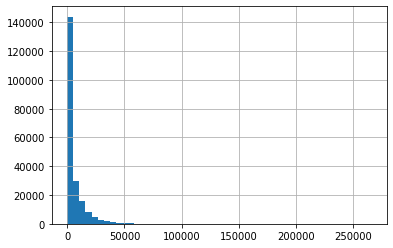

In [16]:
plt.figure()
hist = df.daily_decr30.hist(bins=50)
plt.show()

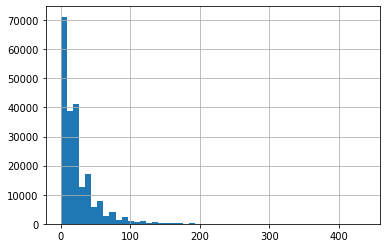

In [17]:
plt.figure()
hist = df.amnt_loans90.hist(bins=50)
plt.show()

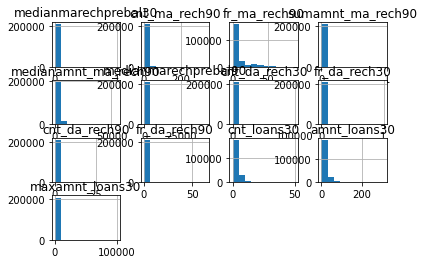

In [18]:

hist = df1.iloc[:,12:25].hist()

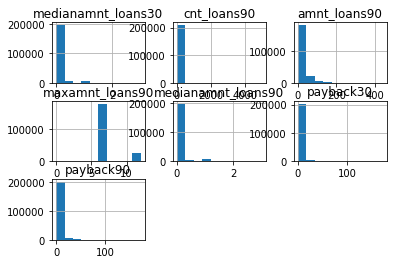

In [19]:
hist = df1.iloc[:,25:32].hist()

<Figure size 864x1080 with 0 Axes>

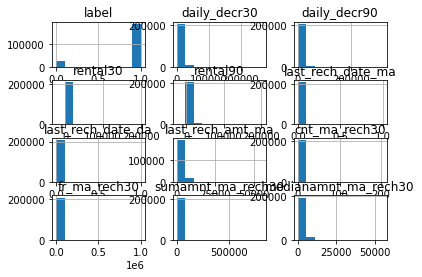

In [20]:
plt.figure(figsize = [12,15])
hist = df1.iloc[:,0:12].hist()
plt.show()

Multiple column has skewness

In [21]:
df1.dtypes

label                     int64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback30               float64
payback9

In [22]:
x = df1.drop('label', axis=1)
y = df1['label']

a = {}
for i in x.columns:
  a[i] = (x[i] < 0).sum().sum()


df2 = pd.DataFrame(a.items())

df2


,0,1
0,daily_decr30,1839
1,daily_decr90,1839
2,rental30,5628
3,rental90,5929
4,last_rech_date_ma,1315
5,last_rech_date_da,14
6,last_rech_amt_ma,0
7,cnt_ma_rech30,0
8,fr_ma_rech30,0
9,sumamnt_ma_rech30,0


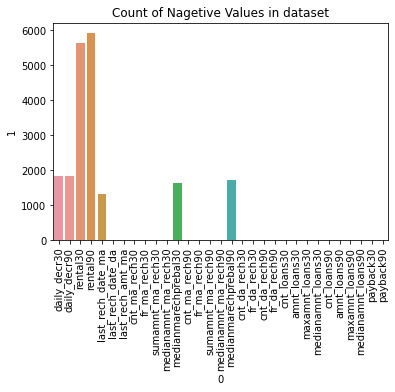

In [23]:
plt.xticks(rotation = 90)
plt.title("Count of Nagetive Values in dataset")
sns.barplot(df2[0],df2[1])
plt.show()

Multiple columns have Nagative data. we will deal with this data by adding minimun value in each columns

In [24]:
#check corrilation 

corr_mat = df1.corr()
corr_mat

,label,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
daily_decr30,0.168298,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,0.001669,0.656986,-0.011792,0.000082,0.886433,-0.152759,0.584060,-0.051347,0.013463,0.002306,-0.002732,0.011981,0.006989,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362
fr_ma_rech30,0.001330,-0.000577,-0.000343,-0.001219,-0.000503,-0.001629,0.001158,0.002876,0.001669,1.000000,0.000714,-0.000579,0.002613,0.001220,-0.001245,-0.000571,-0.001573,-0.002826,-0.000511,-0.001715,0.001574,-0.001925,0.002666,0.002470,-0.001100,-0.000331,0.003368,0.002634,-0.001890,-0.001292,0.001455,0.000998


Text(0.5, 1.0, 'Correlation Matrix')

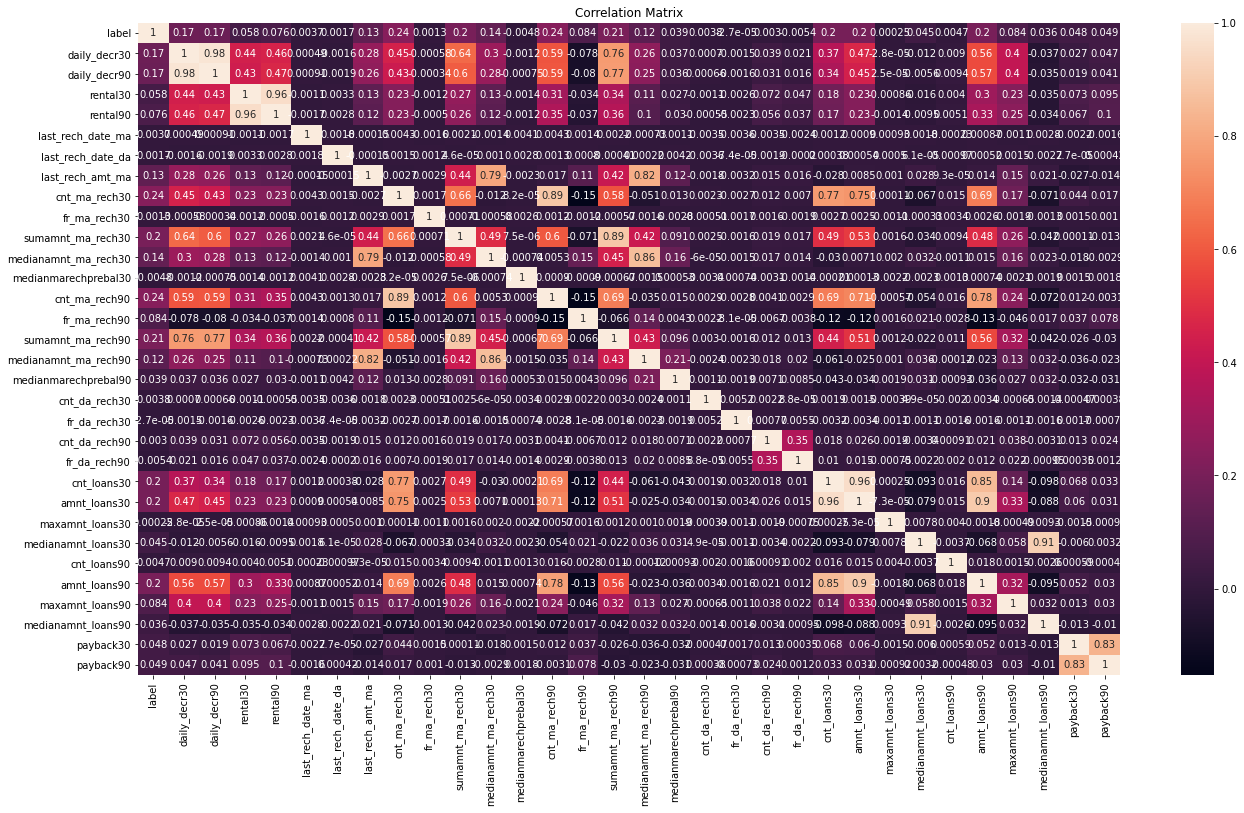

In [25]:
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")

In [26]:
corr_matrix = df.corr()
corr_matrix['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
Unnamed: 0              0.000403
maxamnt_loans30         0.000248
fr_da_rech

### multiple column has very less correlation with dependent variable(column label)

In [27]:
x.min()

daily_decr30              -93.012667
daily_decr90              -93.012667
rental30               -23737.140000
rental90               -24720.580000
last_rech_date_ma         -29.000000
last_rech_date_da         -29.000000
last_rech_amt_ma            0.000000
cnt_ma_rech30               0.000000
fr_ma_rech30                0.000000
sumamnt_ma_rech30           0.000000
medianamnt_ma_rech30        0.000000
medianmarechprebal30     -200.000000
cnt_ma_rech90               0.000000
fr_ma_rech90                0.000000
sumamnt_ma_rech90           0.000000
medianamnt_ma_rech90        0.000000
medianmarechprebal90     -200.000000
cnt_da_rech30               0.000000
fr_da_rech30                0.000000
cnt_da_rech90               0.000000
fr_da_rech90                0.000000
cnt_loans30                 0.000000
amnt_loans30                0.000000
maxamnt_loans30             0.000000
medianamnt_loans30          0.000000
cnt_loans90                 0.000000
amnt_loans90                0.000000
m

Negative value present in data.

In [28]:
x = x + 24721

In [29]:
x.min()

daily_decr30            24627.987333
daily_decr90            24627.987333
rental30                  983.860000
rental90                    0.420000
last_rech_date_ma       24692.000000
last_rech_date_da       24692.000000
last_rech_amt_ma        24721.000000
cnt_ma_rech30           24721.000000
fr_ma_rech30            24721.000000
sumamnt_ma_rech30       24721.000000
medianamnt_ma_rech30    24721.000000
medianmarechprebal30    24521.000000
cnt_ma_rech90           24721.000000
fr_ma_rech90            24721.000000
sumamnt_ma_rech90       24721.000000
medianamnt_ma_rech90    24721.000000
medianmarechprebal90    24521.000000
cnt_da_rech30           24721.000000
fr_da_rech30            24721.000000
cnt_da_rech90           24721.000000
fr_da_rech90            24721.000000
cnt_loans30             24721.000000
amnt_loans30            24721.000000
maxamnt_loans30         24721.000000
medianamnt_loans30      24721.000000
cnt_loans90             24721.000000
amnt_loans90            24721.000000
m

In [30]:
df_col = pd.concat([x,y], axis=1)

In [31]:
df_col.head()

,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,label
0,27776.050000,27786.150000,24941.13,24981.13,24723.0,24721.0,26260,24723,24742.0,27799.0,26260.0,24728.50,24723,24742,27799,26260.0,24728.50,24721.0,24721.0,24721,24721,24723,24733,24727.0,24721.0,24723.0,24733,24727,24721.0,24750.000000,24750.000000,0
1,36843.000000,36845.750000,28412.26,28412.26,24741.0,24721.0,30508,24722,24721.0,30508.0,30508.0,24782.04,24722,24721,30508,30508.0,24782.04,24721.0,24721.0,24721,24721,24722,24733,24733.0,24721.0,24722.0,24733,24733,24721.0,24721.000000,24721.000000,1
2,26119.000000,26119.000000,25621.13,25621.13,24724.0,24721.0,26260,24722,24721.0,26260.0,26260.0,24787.32,24722,24721,26260,26260.0,24787.32,24721.0,24721.0,24721,24721,24722,24727,24727.0,24721.0,24722.0,24727,24727,24721.0,24721.000000,24721.000000,1
3,24742.228000,24742.228000,24880.42,24880.42,24762.0,24721.0,25668,24721,24721.0,24721.0,24721.0,24721.00,24722,24721,25668,25668.0,24723.50,24721.0,24721.0,24721,24721,24723,24733,24727.0,24721.0,24723.0,24733,24727,24721.0,24721.000000,24721.000000,1
4,24871.619333,24871.619333,25819.90,25819.90,24725.0,24721.0,27030,24728,24723.0,44750.0,27030.0,24750.00,24729,24723,48217,27609.0,24756.00,24721.0,24721.0,24721,24721,24728,24763,24727.0,24721.0,24728.0,24763,24727,24721.0,24723.333333,24723.333333,1


<function matplotlib.pyplot.show(close=None, block=None)>

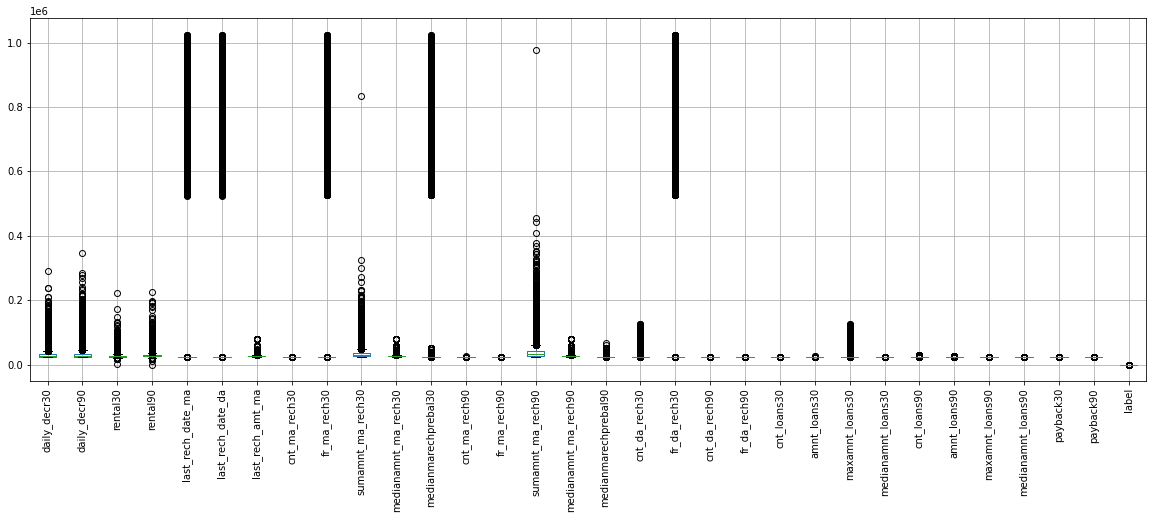

In [32]:
df_col.boxplot(figsize=[20,8])
plt.xticks(rotation = 90)
plt.subplots_adjust(bottom=0.25)
plt.show

In [33]:
#lets Print Outliers
from scipy.stats import zscore
zscr = np.abs(zscore(df_col))
threshold = 3.0
print(np.where(zscr>=3.0))

print("Shape before removing outliers:",df_col.shape)
dsnew = df_col[(zscr <3).all(axis=1)]
print("Shape after removing outliers:",dsnew.shape)

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([13, 13, 30, ..., 26, 24, 28], dtype=int64))
Shape before removing outliers: (209593, 32)
Shape after removing outliers: (163063, 32)


In [34]:
def outlier_IQR(data_frame, feature_name):
  IQR = data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
  lower_bridge = data_frame[feature_name].quantile(0.25) -(IQR*3)
  upper_bridge = data_frame[feature_name].quantile(0.75) + (IQR*3)
  return (lower_bridge,upper_bridge)


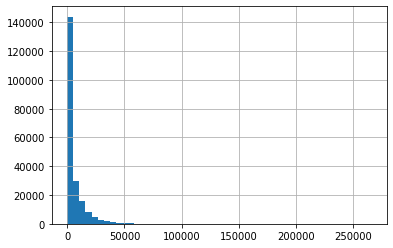

In [35]:
plt.figure()
hist = df.daily_decr30.hist(bins=50)
plt.show()

Data in this column is left skew , applying IQR to remove outliers.

In [36]:
l,u = outlier_IQR(df_col, 'daily_decr30')
df_col.drop(df_col[ (df_col.daily_decr30 > u) | (df_col.daily_decr30 < l) ].index, inplace=True)


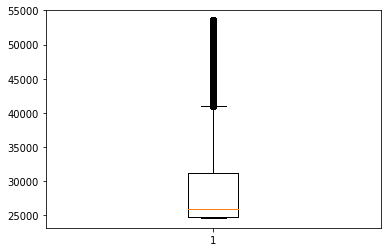

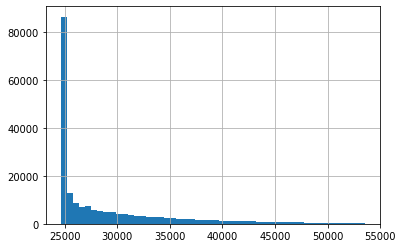

In [37]:
plt.boxplot(df_col.daily_decr30)

plt.figure()
hist = df_col.daily_decr30.hist(bins=50)
plt.show()

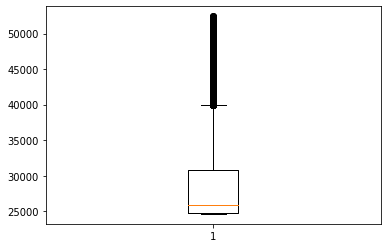

In [38]:
l,u = outlier_IQR(df_col, 'daily_decr90')
df_col.drop(df_col[ (df_col.daily_decr90 > u) | (df_col.daily_decr90 < l) ].index, inplace=True)
plt.boxplot(df_col.daily_decr30)
plt.show()

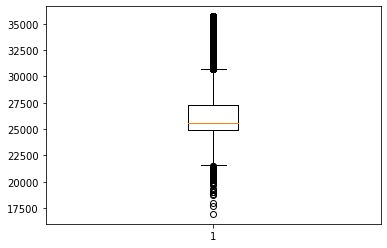

In [39]:
l,u = outlier_IQR(df_col, 'rental30')
df_col.drop(df_col[ (df_col.rental30 > u) | (df_col.rental30 < l) ].index, inplace=True)
plt.boxplot(df_col.rental30)
plt.show()

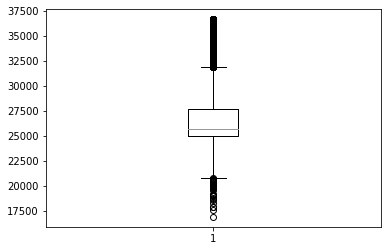

In [40]:
l,u = outlier_IQR(df_col, 'rental90')
df_col.drop(df_col[ (df_col.rental90 > u) | (df_col.rental90 < l) ].index, inplace=True)
plt.boxplot(df_col.rental90)
plt.show()

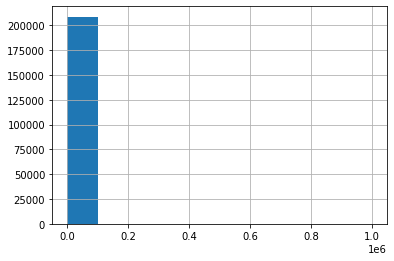

In [41]:
plt.figure()
hist = df.last_rech_date_ma.hist()
plt.show()
plt.show()

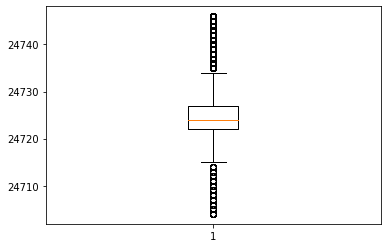

In [42]:
l,u = outlier_IQR(df_col, 'last_rech_date_ma')
df_col.drop(df_col[ (df_col.last_rech_date_ma > u) | (df_col.last_rech_date_ma < l) ].index, inplace=True)
plt.boxplot(df_col.last_rech_date_ma)
plt.show()

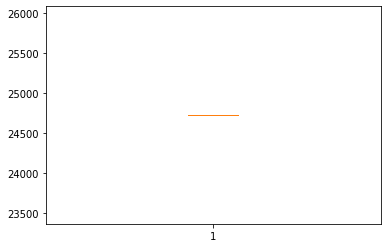

In [43]:
l,u = outlier_IQR(df_col, 'maxamnt_loans30')
df_col.drop(df_col[ (df_col.maxamnt_loans30 > u) | (df_col.maxamnt_loans30 < l) ].index, inplace=True)
plt.boxplot(df_col.maxamnt_loans30)
plt.show()

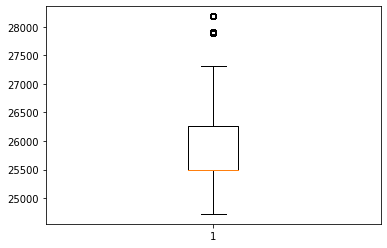

In [44]:
l,u = outlier_IQR(df_col, 'last_rech_amt_ma')
df_col.drop(df_col[ (df_col.last_rech_amt_ma > u) | (df_col.last_rech_amt_ma < l) ].index, inplace=True)
plt.boxplot(df_col.last_rech_amt_ma)
plt.show()

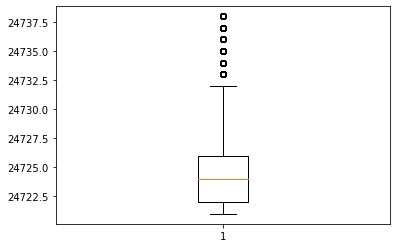

In [45]:
l,u = outlier_IQR(df_col, 'cnt_ma_rech30')
df_col.drop(df_col[ (df_col.cnt_ma_rech30 > u) | (df_col.cnt_ma_rech30 < l) ].index, inplace=True)
plt.boxplot(df_col.cnt_ma_rech30)
plt.show()

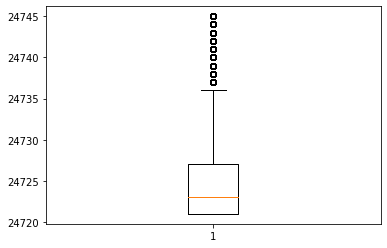

In [46]:
l,u = outlier_IQR(df_col, 'fr_ma_rech30')
df_col.drop(df_col[ (df_col.fr_ma_rech30 > u) | (df_col.fr_ma_rech30 < l) ].index, inplace=True)
plt.boxplot(df_col.fr_ma_rech30)
plt.show()

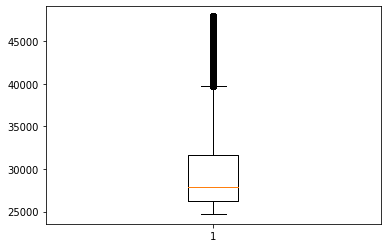

In [47]:
l,u = outlier_IQR(df_col, 'sumamnt_ma_rech30')
df_col.drop(df_col[ (df_col.sumamnt_ma_rech30 > u) | (df_col.sumamnt_ma_rech30 < l) ].index, inplace=True)
plt.boxplot(df_col.sumamnt_ma_rech30)
plt.show()

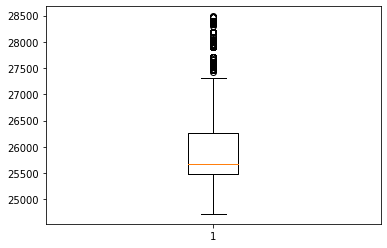

In [48]:
l,u = outlier_IQR(df_col, 'medianamnt_ma_rech30')
df_col.drop(df_col[ (df_col.medianamnt_ma_rech30 > u) | (df_col.medianamnt_ma_rech30 < l) ].index, inplace=True)
plt.boxplot(df_col.medianamnt_ma_rech30)
plt.show()

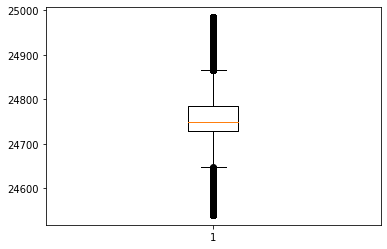

In [49]:
l,u = outlier_IQR(df_col, 'medianmarechprebal30')
df_col.drop(df_col[ (df_col.medianmarechprebal30 > u) | (df_col.medianmarechprebal30 < l) ].index, inplace=True)
plt.boxplot(df_col.medianmarechprebal30)
plt.show()

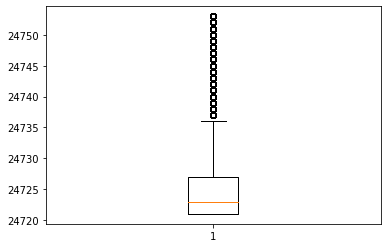

In [50]:
l,u = outlier_IQR(df_col, 'fr_ma_rech90')
df_col.drop(df_col[ (df_col.fr_ma_rech90 > u) | (df_col.fr_ma_rech90 < l) ].index, inplace=True)
plt.boxplot(df_col.fr_ma_rech90)
plt.show()

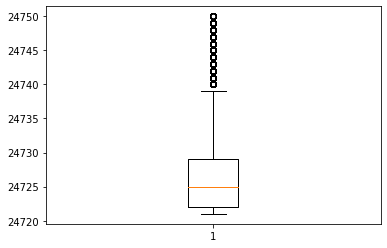

In [51]:
l,u = outlier_IQR(df_col, 'cnt_ma_rech90')
df_col.drop(df_col[ (df_col.cnt_ma_rech90 > u) | (df_col.cnt_ma_rech90 < l) ].index, inplace=True)
plt.boxplot(df_col.cnt_ma_rech90)
plt.show()

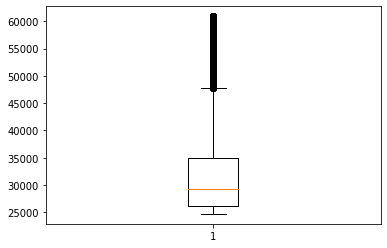

In [52]:
l,u = outlier_IQR(df_col, 'sumamnt_ma_rech90')
df_col.drop(df_col[ (df_col.sumamnt_ma_rech90 > u) | (df_col.sumamnt_ma_rech90 < l) ].index, inplace=True)
plt.boxplot(df_col.sumamnt_ma_rech90)
plt.show()

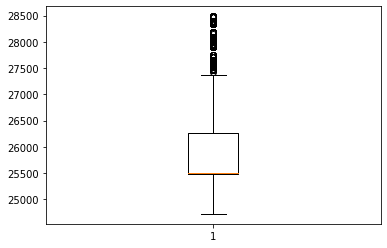

In [53]:
l,u = outlier_IQR(df_col, 'medianamnt_ma_rech90')
df_col.drop(df_col[ (df_col.medianamnt_ma_rech90> u) | (df_col.medianamnt_ma_rech90 < l) ].index, inplace=True)
plt.boxplot(df_col.medianamnt_ma_rech90)
plt.show()

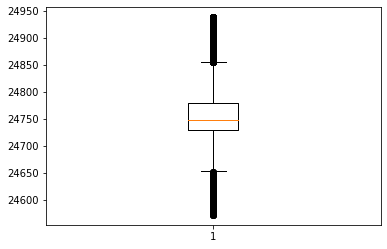

In [54]:
l,u = outlier_IQR(df_col, 'medianmarechprebal90')
df_col.drop(df_col[ (df_col.medianmarechprebal90 > u) | (df_col.medianmarechprebal90 < l) ].index, inplace=True)
plt.boxplot(df_col.medianmarechprebal90)
plt.show()

In [55]:
print("Shape before removing outliers:",df.shape)
print("Shape after removing outliers:",df_col.shape)

Shape before removing outliers: (209593, 37)
Shape after removing outliers: (110602, 32)


In [56]:
#percentage of data loss after removing outlier is:-
percent = 110602/209593*100

print(percent)

52.769892124259876


In [57]:
df_col = pd.concat([x,y], axis=1)

df_col.shape

(209593, 32)

In [58]:
#Delete columns which are very less correlation with target variable, below independent variables having near to zero correlation , hence it is safe to delete these variable.

#cnt_loans90             0.004733
#cnt_da_rech30           0.003827
#last_rech_date_ma       0.003728
#cnt_da_rech90           0.002999
#last_rech_date_da       0.001711
#fr_ma_rech30            0.001330
#maxamnt_loans30         0.000248

df_col1=df_col.drop(["cnt_loans90","cnt_da_rech30","last_rech_date_ma","cnt_da_rech90","last_rech_date_da","fr_ma_rech30","maxamnt_loans30"],axis=1)


df_col1.head()

,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,fr_da_rech30,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,label
0,27776.050000,27786.150000,24941.13,24981.13,26260,24723,27799.0,26260.0,24728.50,24723,24742,27799,26260.0,24728.50,24721.0,24721,24723,24733,24721.0,24733,24727,24721.0,24750.000000,24750.000000,0
1,36843.000000,36845.750000,28412.26,28412.26,30508,24722,30508.0,30508.0,24782.04,24722,24721,30508,30508.0,24782.04,24721.0,24721,24722,24733,24721.0,24733,24733,24721.0,24721.000000,24721.000000,1
2,26119.000000,26119.000000,25621.13,25621.13,26260,24722,26260.0,26260.0,24787.32,24722,24721,26260,26260.0,24787.32,24721.0,24721,24722,24727,24721.0,24727,24727,24721.0,24721.000000,24721.000000,1
3,24742.228000,24742.228000,24880.42,24880.42,25668,24721,24721.0,24721.0,24721.00,24722,24721,25668,25668.0,24723.50,24721.0,24721,24723,24733,24721.0,24733,24727,24721.0,24721.000000,24721.000000,1
4,24871.619333,24871.619333,25819.90,25819.90,27030,24728,44750.0,27030.0,24750.00,24729,24723,48217,27609.0,24756.00,24721.0,24721,24728,24763,24721.0,24763,24727,24721.0,24723.333333,24723.333333,1


In [59]:
df_col = df_col1

### Obsarvation:- 
Around 23% od dataloss, we are not going to remove outlier in this case.hence not removing as of now.


In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df_col) 
df_col.loc[:,:] = scaled_values

In [61]:
#split independent and target variable in x and y dataset.
x = df_col.drop('label', axis=1)
y = df_col['label']

x.isnull().sum()

daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_amt_ma        0
cnt_ma_rech30           0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
fr_da_rech30            0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
medianamnt_loans30      0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

In [62]:
x.shape

(209593, 24)

In [63]:
x.dtypes

daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_amt_ma        float64
cnt_ma_rech30           float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90           float64
fr_ma_rech90            float64
sumamnt_ma_rech90       float64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
fr_da_rech30            float64
fr_da_rech90            float64
cnt_loans30             float64
amnt_loans30            float64
medianamnt_loans30      float64
amnt_loans90            float64
maxamnt_loans90         float64
medianamnt_loans90      float64
payback30               float64
payback90               float64
dtype: object

In [64]:
y.shape

(209593,)

In [65]:
from sklearn import preprocessing
column = x.columns
x = preprocessing.normalize(x)
x = pd.DataFrame(x, columns=column)
x.head()

,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,fr_da_rech30,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0.018836,0.015674,0.171258,0.176822,0.044539,0.015682,0.006048,0.044539,0.000330,0.009474,0.379838,0.005141,0.044539,0.007929,0.0,0.0,0.063668,0.062420,0.0,0.043608,0.795851,0.0,0.269151,0.269151
1,0.044375,0.036814,0.119044,0.122102,0.101682,0.004761,0.006904,0.101682,0.000252,0.002876,0.000000,0.005868,0.101682,0.006056,0.0,0.0,0.019328,0.037898,0.0,0.026477,0.966394,0.0,0.000000,0.000000
2,0.010617,0.008806,0.209600,0.215829,0.053006,0.009332,0.003599,0.053006,0.000505,0.005638,0.000000,0.003059,0.053006,0.012111,0.0,0.0,0.037886,0.037143,0.0,0.025949,0.947148,0.0,0.000000,0.000000
3,0.000814,0.000675,0.203446,0.209742,0.032640,0.000000,0.000000,0.000000,0.000379,0.005642,0.000000,0.001884,0.032640,0.009215,0.0,0.0,0.075827,0.074340,0.0,0.051936,0.947836,0.0,0.000000,0.000000
4,0.001586,0.001316,0.193165,0.198844,0.072703,0.059717,0.042817,0.072703,0.000397,0.041233,0.039359,0.042695,0.090934,0.009770,0.0,0.0,0.242450,0.237696,0.0,0.166061,0.865892,0.0,0.023562,0.023562


In [66]:
x.skew()

daily_decr30             2.910436
daily_decr90             3.102497
rental30                 3.169900
rental90                 3.403691
last_rech_amt_ma         2.559360
cnt_ma_rech30            2.078435
sumamnt_ma_rech30        3.321014
medianamnt_ma_rech30     2.560279
medianmarechprebal30    14.365509
cnt_ma_rech90            2.411455
fr_ma_rech90             1.834957
sumamnt_ma_rech90        3.177321
medianamnt_ma_rech90     2.717029
medianmarechprebal90    23.740611
fr_da_rech30            14.411550
fr_da_rech90            25.444929
cnt_loans30              1.851391
amnt_loans30             1.777793
medianamnt_loans30       4.048133
amnt_loans90             2.045794
maxamnt_loans90         -3.382566
medianamnt_loans90       4.369098
payback30                4.911767
payback90                4.381607
dtype: float64

In [67]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(x)

In [68]:
x = pd.DataFrame(data_trans, columns = x.columns)
x.skew()

daily_decr30             0.562820
daily_decr90             0.605132
rental30                -0.209988
rental90                -0.204805
last_rech_amt_ma         0.246359
cnt_ma_rech30            0.231477
sumamnt_ma_rech30        0.299848
medianamnt_ma_rech30     0.182350
medianmarechprebal30     7.128395
cnt_ma_rech90            0.279985
fr_ma_rech90             0.596603
sumamnt_ma_rech90        0.332690
medianamnt_ma_rech90     0.192970
medianmarechprebal90     0.054731
fr_da_rech30            14.042294
fr_da_rech90            15.469700
cnt_loans30              0.289712
amnt_loans30             0.286160
medianamnt_loans30       3.447736
amnt_loans90             0.385705
maxamnt_loans90         -0.482575
medianamnt_loans90       3.779598
payback30                0.702840
payback90                0.656846
dtype: float64

In [ ]:
#x=np.log(x)
#from scipy.stats import boxcox
#for i in x.columns:
#  x[i] = np.sqrt(x[i]) 


In [69]:
x.skew()

daily_decr30             0.562820
daily_decr90             0.605132
rental30                -0.209988
rental90                -0.204805
last_rech_amt_ma         0.246359
cnt_ma_rech30            0.231477
sumamnt_ma_rech30        0.299848
medianamnt_ma_rech30     0.182350
medianmarechprebal30     7.128395
cnt_ma_rech90            0.279985
fr_ma_rech90             0.596603
sumamnt_ma_rech90        0.332690
medianamnt_ma_rech90     0.192970
medianmarechprebal90     0.054731
fr_da_rech30            14.042294
fr_da_rech90            15.469700
cnt_loans30              0.289712
amnt_loans30             0.286160
medianamnt_loans30       3.447736
amnt_loans90             0.385705
maxamnt_loans90         -0.482575
medianamnt_loans90       3.779598
payback30                0.702840
payback90                0.656846
dtype: float64

In [70]:
x.isnull().sum()

daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_amt_ma        0
cnt_ma_rech30           0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
fr_da_rech30            0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
medianamnt_loans30      0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

In [71]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.50,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test,predrf)
    if acc >maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is", maxAccu, "on Random_state",maxRS)

Best accuracy is 0.8805213889710584 on Random_state 123


In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.50,random_state=123)

In [73]:
#!pip install imblearn

In [74]:
#! pip install imbalanced-learn

#!pip install imbalanced-learn --upgrade

In [78]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 91463
Before OverSampling, counts of label '0': 13333 

After OverSampling, the shape of train_X: (182926, 24)
After OverSampling, the shape of train_y: (182926,) 

After OverSampling, counts of label '1': 91463
After OverSampling, counts of label '0': 91463


In [79]:
x = x_train_res
y = y_train_res

In [80]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.50,random_state=120)

In [81]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(f1_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))   
print(classification_report(y_test,predlr))

0.7678733476925096
0.7619389345503066
[[36256  9468]
 [11763 33976]]
              precision    recall  f1-score   support

         0.0       0.76      0.79      0.77     45724
         1.0       0.78      0.74      0.76     45739

    accuracy                           0.77     91463
   macro avg       0.77      0.77      0.77     91463
weighted avg       0.77      0.77      0.77     91463



In [82]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(LR,x,y,scoring="f1", cv=5)   #cv for 5 split 
print("Corss validation scre for LOgistic regression", scr.mean())

Corss validation scre for LOgistic regression 0.7625807471662991


In [83]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(f1_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))   
print(classification_report(y_test,predrf))

0.9006811497545456
0.9001341219410303
[[41440  4284]
 [ 4800 40939]]
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90     45724
         1.0       0.91      0.90      0.90     45739

    accuracy                           0.90     91463
   macro avg       0.90      0.90      0.90     91463
weighted avg       0.90      0.90      0.90     91463



In [84]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rf,x,y,scoring="f1",cv=5)   #cv for 5 split 
print("Corss validation scre for Random Forest", scr.mean())

Corss validation scre for Random Forest 0.9215973376766137


In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(f1_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8578004220285799
0.8434106287172819
[[43431  2293]
 [10713 35026]]
              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87     45724
         1.0       0.94      0.77      0.84     45739

    accuracy                           0.86     91463
   macro avg       0.87      0.86      0.86     91463
weighted avg       0.87      0.86      0.86     91463



In [86]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(knn,x,y,scoring="f1",cv=5)   #cv for 5 split 
print("Corss validation scre for Knearest Neigbour Classification", scr.mean())

Corss validation scre for Knearest Neigbour Classification 0.8648165507333369


In [87]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train,y_train)
predsv = sv.predict(x_test)
print(f1_score(y_test,predsv))
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))   
print(classification_report(y_test,predsv))

0.7846972857745402
0.7935011972054273
[[38158  7566]
 [11321 34418]]
              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80     45724
         1.0       0.82      0.75      0.78     45739

    accuracy                           0.79     91463
   macro avg       0.80      0.79      0.79     91463
weighted avg       0.80      0.79      0.79     91463



In [88]:
#from sklearn.model_selection import cross_val_score
#scr = cross_val_score(sv,x,y,cv=5)   #cv for 5 split 
#print("Corss validation scre for support vector", scr.mean())

In [89]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rf,x,y,scoring="f1",cv=5)   #cv for 5 split 
print("Corss validation scre for Random Forest", scr.mean())

Corss validation scre for Random Forest 0.921834110377452


#### Obsarvation:-

Higest F1 Score is coming for Random Forest Classification model, hence this is the best model we can use.

In [90]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

y_pred_prob=rf.predict_proba(x_test)[:,1]
y_pred_prob

array([0.88, 0.33, 0.64, ..., 0.  , 0.1 , 1.  ])

In [91]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

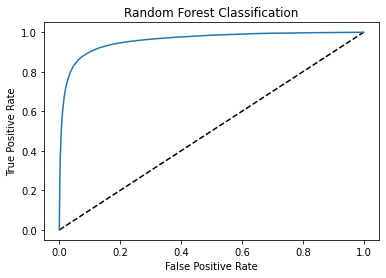

In [92]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classification")
plt.show()

In [93]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Apply Random SearchCV for Random Forest Model
parameters = {"n_estimators":[100,200,300,400,500,600,700,800], "criterion":["mse","mae"]
              ,"max_depth":[3,4,5,6,7,8,10,25],"min_samples_split":[2,5,8.10,12,18]
              ,"max_features":['auto', 'sqrt'],"min_samples_leaf":[1,3,5,6,7] }
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.50,random_state=120)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = parameters, n_iter = 100, cv = 2, verbose=2, random_state=120, n_jobs = -1)
# Fit the random search model

result=rf_random.fit(x_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


Fitting 2 folds for each of 100 candidates, totalling 200 fits


**Issue here:- ** this cell run for more then 3 -4 hour print ab ove two lines on which are printed at the begining of the execution, after this even if jupyter notebook reports that execution completed , do not get required tuning parameters.

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(f1_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))   
print(classification_report(y_test,predrf))